# US AIRLINE PASSENGER SATISFACTION ANALYSIS

May 2019

### 1 Introduction

Many people would choose to travel by airplane. People would provide feedback form after taking airplane. Airline companies can improve themselves based on the data they received, so passenger satisfaction feedback is important for airline companies. In this paper, passenger satisfaction of US Airline will be discussed.

Dataset of US Airline Passenger Satisfaction Survey (https://www.kaggle.com/johndddddd/customer-satisfaction) owned by John D will be used for this project. As shown in Figure 1, the dataset contains around 130000 feedback records and 24 features, such as “Food and Drink”, “Online Support”, and “Arrived Delays”. Most features are categorical that a passenger can give a score from 1 to 5. The “1” stands for poor or least satisfied, and the “5” stands for excellent or most satisfied. The “0” indicates Not Applicable, so the dataset should be processed to remove all “0” elements in these features. Another features are numerical, like “Arrival Delays” which indicate the time that delays from the original plan. 

In [1]:
from datascience import *
import numpy as np
import operator
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### 2 Data Processing
The features of “id” and “Class” are dropped because they are not relate to this analysis. The rows contained 'NaN' are removed using “inputraw = inputraw.dropna()”. The “0” in categorical features indicates Not Applicable, so the dataset is also processed to remove all “0” elements. For example, “0” elements in “Seat comfort” can be removed using
“inputraw = inputraw[inputraw['Seat comfort'] !=0]”. The dataset after initial filtering is shown in Figure 2. 

In [2]:
import pandas as pd
inputraw = pd.read_csv("dataraw.csv")
inputraw = inputraw.dropna()
inputraw = inputraw[inputraw['Seat comfort'] !=0]
inputraw = inputraw[inputraw['Departure/Arrival time convenient'] !=0]
inputraw = inputraw[inputraw['Food and drink'] !=0]
inputraw = inputraw[inputraw['Gate location'] !=0]
inputraw = inputraw[inputraw['Inflight wifi service'] !=0]
inputraw = inputraw[inputraw['Inflight entertainment'] !=0]
inputraw = inputraw[inputraw['Online support'] !=0]
inputraw = inputraw[inputraw['Ease of Online booking'] !=0]
inputraw = inputraw[inputraw['On-board service'] !=0]
inputraw = inputraw[inputraw['Leg room service'] !=0]
inputraw = inputraw[inputraw['Baggage handling'] !=0]
inputraw = inputraw[inputraw['Checkin service'] !=0]
inputraw = inputraw[inputraw['Cleanliness'] !=0]
inputraw = inputraw[inputraw['Online boarding'] !=0]

inputraw = inputraw.drop(columns=['id'])
inputraw = inputraw.drop(columns=['Class'])
inputraw.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1037,neutral or dissatisfied,Male,Loyal Customer,48,Personal Travel,4001,1,1,1,1,...,1,1,4,1,1,4,2,1,16,0.0
1038,neutral or dissatisfied,Male,Loyal Customer,48,Personal Travel,3980,1,1,1,1,...,4,4,2,3,2,3,2,4,0,0.0
1041,neutral or dissatisfied,Male,Loyal Customer,40,Personal Travel,2251,1,1,1,1,...,1,1,3,3,2,1,1,1,0,8.0
1043,neutral or dissatisfied,Male,Loyal Customer,46,Personal Travel,2453,1,1,1,1,...,5,3,1,4,1,2,2,3,3,15.0
1044,neutral or dissatisfied,Male,Loyal Customer,63,Personal Travel,2011,1,1,1,1,...,5,5,1,5,2,1,2,5,25,25.0


Using One Hot Encoding, features’ categorical data can be converted into numerical values. If an entry’s category is the same as its column’s title, the element will be 1; otherwise, it will be 0. One Hot Encoding using “onehot = pd.get_dummies(inputraw['Gender'],drop_first=True)” can convert “Male” and “Female” into 1 and 0 for “Gender” feature. If an entry is “Male” which is the same as its column’s title, its cell value will be 1. One Hot Encoding is applied to the features of “satisfaction”, “Type of Travel”, “Customer Type”, and “Gender”. These features are replacing their original categorical data using drop function and “inputraw = onehot.join(inputraw)”. The label “satisfaction” in supervised learning is whether a customer satisfied (y=1) or not satisfied (y=0) during the trip. Customers who are not satisfied with the service include neutral or dissatisfied opinions. Dataset processed after One Hot Encoding is shown in Figure 3. 

In [3]:
onehot = pd.get_dummies(inputraw['Type of Travel'],drop_first=True)
inputraw = onehot.join(inputraw)
onehot = pd.get_dummies(inputraw['Customer Type'],drop_first=False)
inputraw = onehot.join(inputraw)
onehot = pd.get_dummies(inputraw['Gender'],drop_first=True)
inputraw = onehot.join(inputraw)
onehot = pd.get_dummies(inputraw['satisfaction'],drop_first=True)
inputraw = onehot.join(inputraw)

inputraw = inputraw.drop(columns=['Type of Travel'])
inputraw = inputraw.drop(columns=['Customer Type'])
inputraw = inputraw.drop(columns=['Gender'])
inputraw = inputraw.drop(columns=['satisfaction'])
inputraw = inputraw.drop(columns=['disloyal Customer'])

inputraw.head()

,satisfied,Male,Loyal Customer,Personal Travel,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1037,0,1,1,1,48,4001,1,1,1,1,...,1,1,4,1,1,4,2,1,16,0.0
1038,0,1,1,1,48,3980,1,1,1,1,...,4,4,2,3,2,3,2,4,0,0.0
1041,0,1,1,1,40,2251,1,1,1,1,...,1,1,3,3,2,1,1,1,0,8.0
1043,0,1,1,1,46,2453,1,1,1,1,...,5,3,1,4,1,2,2,3,3,15.0
1044,0,1,1,1,63,2011,1,1,1,1,...,5,5,1,5,2,1,2,5,25,25.0


### 3 Formulated Questions
Three questions have been formulated and answered using the dataset. Each question uses a different methodology learned in class, and contains quantitative and qualitative components. Jupyter notebook is employed to state concrete questions, hypotheses, and methodologies, and to present the significance of the results.

### 3.1 Question 1: For long arrival delays, which passengers might be satisfied?

In this question, satisfaction level affected by the feature of “Arrival Delay in Minutes” would be studies. This feature indicates how long passengers wait before the airplane arriving at the destination without sticking to the original plan. No one wants his airplane to arrive late, so passengers would be unsatisfied if the arrival delay is too long. For short arrival delays, the passengers might be tolerant, but for very long arrival delays, they might be upset. Most airline companies would compensate long wait customers with money or hotel, so their reviews would be neutral (y=0). As a result, observations from the first 300 minutes delay will be analyzed for this question. At an arrival delay time that is greater than 0 minute, if a passenger is satisfied, he will vote y=1 for his satisfaction score; otherwise, he will vote y=0.  

In addition, “Customer Type” might also be another important factor that affects the result. Most airline companies have Loyal Customer program. Passengers in this program are provided with privileges, such as priority boarding and trip rewards. For each satisfaction score, customer type has been further divided into Loyal Customer (x=1) and Disloyal Customer (x=0). Figure 4 presents the count of votes for each category. At the same arrival delay time, satisfaction level has been separated into two groups (y=0 and y=1). At the same satisfaction level, customer type would be categorized into Loyal Customer (x=1) and Disloyal Customer (x=0). 

In [4]:
data = inputraw[inputraw['Arrival Delay in Minutes'] !=0]
data = Table.from_df(data)
q1inraw = Table().with_column('Arrival Delay (min)',data.column('Arrival Delay in Minutes'),
                           'Satisfaction (y=1)', data.column('satisfied'),
                           'Loyal Customer (x=1)',data.column('Loyal Customer'))
q1inraw = q1inraw.where('Arrival Delay (min)', are.between(0,301))
q1in = q1inraw.groups(['Arrival Delay (min)','Satisfaction (y=1)','Loyal Customer (x=1)'])
q1in

Arrival Delay (min),Satisfaction (y=1),Loyal Customer (x=1),count
1,0,0,311
1,0,1,697
1,1,0,77
1,1,1,1431
2,0,0,323
2,0,1,681
2,1,0,72
2,1,1,1276
3,0,0,243
3,0,1,649


According to Professor’s feedback in presentation, the “Arrival Delay in Minutes” could be bundled into buckets of every 10 minutes (0-10 min, 11-20 min, etc.). In each bucket, a mean value of satisfaction could be calculated with respect to the raw sum of all rows’ count in the bucket. For example, in the bucket range 20-30 min arrival delay, there are 6320 rows, and only 3001 are satisfied (y=1). The mean satisfaction score for this bucket would therefore be 3001/6320=0.475. The mean value of satisfaction of each bucket is listed in Figure 5 and plotted in Figure 6. From the plot, passenger satisfaction is decreasing as the arrival delay time is increasing.

Satisfaction (y=1),count,Satisfy Rate % wrt Bucket,Bucket Range
1,9660,0.541207,"[0, 10]"
1,5191,0.475149,"[10, 20]"
1,3001,0.474842,"[20, 30]"
1,1888,0.466749,"[30, 40]"
1,1365,0.475776,"[40, 50]"
1,991,0.482238,"[50, 60]"
1,749,0.476463,"[60, 70]"
1,546,0.466667,"[70, 80]"
1,422,0.444211,"[80, 90]"
1,381,0.485969,"[90, 100]"


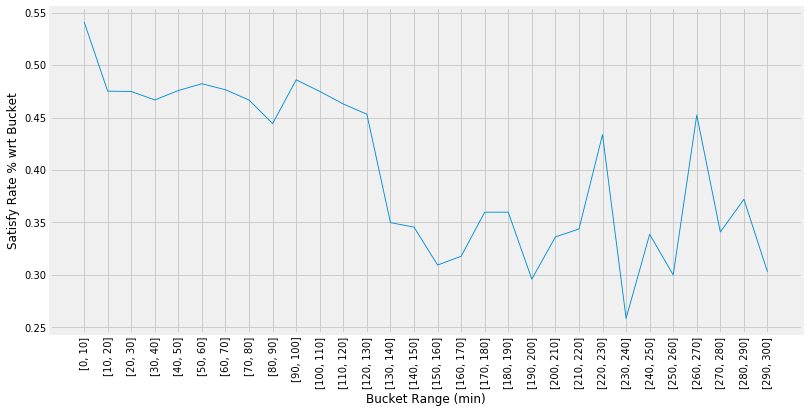

In [5]:
%matplotlib inline
q1bukt = Table(make_array('Satisfaction (y=1)','count','Satisfy Rate % wrt Bucket','Bucket Range'))                              
for i in range(30):
    q11 = q1inraw.where('Arrival Delay (min)', are.between(i*10,(i+1)*10)) #includes 0 but excludes 10
    q11c = q11.group('Satisfaction (y=1)')    
    q11 = q11c.with_column('Satisfy Rate % wrt Bucket', q11c.column('count')/q11.num_rows)
    q11 = q11.with_column('Bucket Range',str([i*10,(i+1)*10]))
    q11 = q11.take(1)    
    q1bukt = q1bukt.append(q11)
plots.figure(figsize=(12,6))
plots.plot(q1bukt.column('Bucket Range'), q1bukt.column('Satisfy Rate % wrt Bucket'),linewidth=0.9)
plots.xlabel('Bucket Range (min)')
plots.ylabel('Satisfy Rate % wrt Bucket')
plots.xticks(q1bukt.column('Bucket Range'), q1bukt.column('Bucket Range'), rotation='vertical')
q1bukt

According to Professor’s feedback in presentation, customer type might have a strong influence on satisfaction level. In each delay time, only satisfied customers are picked (“Loyal + Disloyal total in y=1” in Figure 7) and normalized with respect to total amount of votes (“Loyal + Disloyal Customer Satisfied % wrt total” in Figure 7). From these satisfied customers, only loyal customers are picked (“Loyal Count in y=1” in Figure 7) and normalized with respect to total amount of votes (“Loyal Customer Satisfied % wrt total” in Figure 7). For instance, total amount of votes is 52436; at the delay time of 3min, there are 1324 passengers that are satisfied, and within these satisfied customers, there are 1253 passengers that are loyal customers. The ratios of these two categories are 1324/52436=2.52% and 1253/52436=2.39%. The tabulated ratios in Figure 7 are plotted in Figure 8. The green line indicates both loyal and disloyal customers that vote satisfied. The red line shows only loyal customers that vote satisfied. As observed from the plot, passengers who are satisfied are dominated by loyal customers even in long arrival delays. Hence, loyal customers are more satisfied than disloyal customers at the same level of arrival delay. Loyalty is a good strategy for airlines to promote as it improves passengers’ perception.

Arrival Delay (min),Loyal Count in y=1,Loyal Customer Satisfied % wrt total,Loyal + Disloyal total in y=1,Loyal + Disloyal Customer Satisfied % wrt total
1,1431,2.72904,1508,2.87589
2,1276,2.43344,1348,2.57075
3,1253,2.38958,1324,2.52498
4,1208,2.30376,1273,2.42772
5,1034,1.97193,1098,2.09398
6,851,1.62293,894,1.70494
7,725,1.38264,767,1.46274
8,719,1.3712,754,1.43794
9,661,1.26058,694,1.32352
10,632,1.20528,661,1.26058


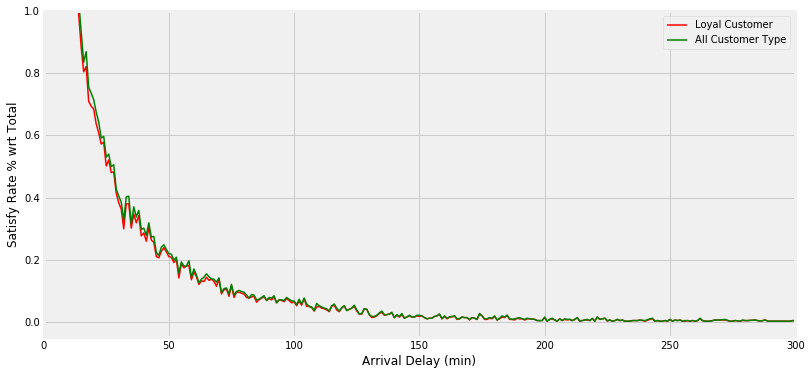

In [6]:
%matplotlib inline
q1 = q1in.where('Satisfaction (y=1)',are.equal_to(1))
q1 = q1.groups('Arrival Delay (min)',sum)
q1 = q1.with_column('Loyal + Disloyal Customer Satisfied % wrt total', 100*q1.column('count sum')/(q1in.column('count').sum()))
q1 = q1.drop('Satisfaction (y=1) sum')  
q1 = q1.drop('Loyal Customer (x=1) sum')
q1 = q1.relabeled('count sum','Loyal + Disloyal total in y=1')

q12 = q1in.where('Satisfaction (y=1)',are.equal_to(1))
q12 = q12.where('Loyal Customer (x=1)',are.equal_to(1))
q12 = q12.with_column('Loyal Customer Satisfied % wrt total', 100*q12.column('count')/(q1in.column('count').sum()))
q12 = q12.drop('Satisfaction (y=1)')  
q12 = q12.drop('Loyal Customer (x=1)')  
q12 = q12.relabeled('count','Loyal Count in y=1')

qq2 = q12.join('Arrival Delay (min)',q1)

plots.figure(figsize=(12,6))
plots.plot(qq2.column('Arrival Delay (min)'), qq2.column('Loyal Customer Satisfied % wrt total'),'r',
           qq2.column('Arrival Delay (min)'),qq2.column('Loyal + Disloyal Customer Satisfied % wrt total'),'g',linewidth=1.5)
plots.ylim((-0.05,1))
plots.xlim((0,300))
plots.xlabel('Arrival Delay (min)')
plots.ylabel('Satisfy Rate % wrt Total')
plots.legend(['Loyal Customer','All Customer Type'])

qq2

### 3.2 Question 2: How many passengers give high score level on “Food and Drink”?

In this question, inflight services would be researched. After boarding, the next important thing is food and drink. Passengers always look forward to have delicious meals. “Food and Drink” scores are categorized from 1 to 5 level, and passengers can vote based their reviews of food quality. If a passenger upsets with the food, he will vote 1. If a passenger is totally satisfied with the food and drink, he will give a score of 5. At each satisfaction level, voting passengers are counted, and their percentage is calculated based on the total votes. As shown in Figure 9, the listed percentages have been plotted in a pie chart. Only 15.7% passengers have given the highest score on food and drink, and 17.5% passengers have given the lowest score. The percentages at score levels 2, 3, and 4 are similar, which are 22.6%, 23.1%, and 21.2%. The analysis indicates that most passengers might have neutral opinions, and the quality of food and drink might be above satisfactory. 

In [7]:
q2 = Table().with_column('Satisfaction Level of Food and Drink',data.column('Food and drink'))
q2_group = q2.group('Satisfaction Level of Food and Drink')
q2_group = q2_group.with_column('Percentage',q2_group[1]/q2_group[1].sum()*100)
q2_group

Satisfaction Level of Food and Drink,count,Percentage
1,9203,17.4557
2,11911,22.5921
3,12169,23.0814
4,11171,21.1885
5,8268,15.6823


(-1.1303168576277003,
 1.1168698771572667,
 -1.1247423219093622,
 1.1934809703454492)

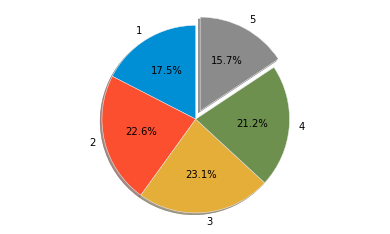

In [8]:
%matplotlib inline
labels = q2_group[0]
sizes = q2_group[1]
explode = (0,0,0,0,0.1)
fig1,ax1 = plots.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

### 3.3 Question 3: Estimate the accuracy of k-Nearest Neighbor (k=3, 5, and 7) and other Classifiers on this dataset?

To test if a feature is relevant to the label and is independent and identically distributed (iid) from other features, Correlation Matrix shown in Figure 10 has been implemented with color coding. The package is employed from seaborn, and the color bar is centred at 0. So either the feature is positive relevant (1 in color bar) or negative relevant (-1 in color bar) to other variables can be observed using “sns.heatmap(inputraw.corr(), annot=True, fmt='.2f',center=0)”. 

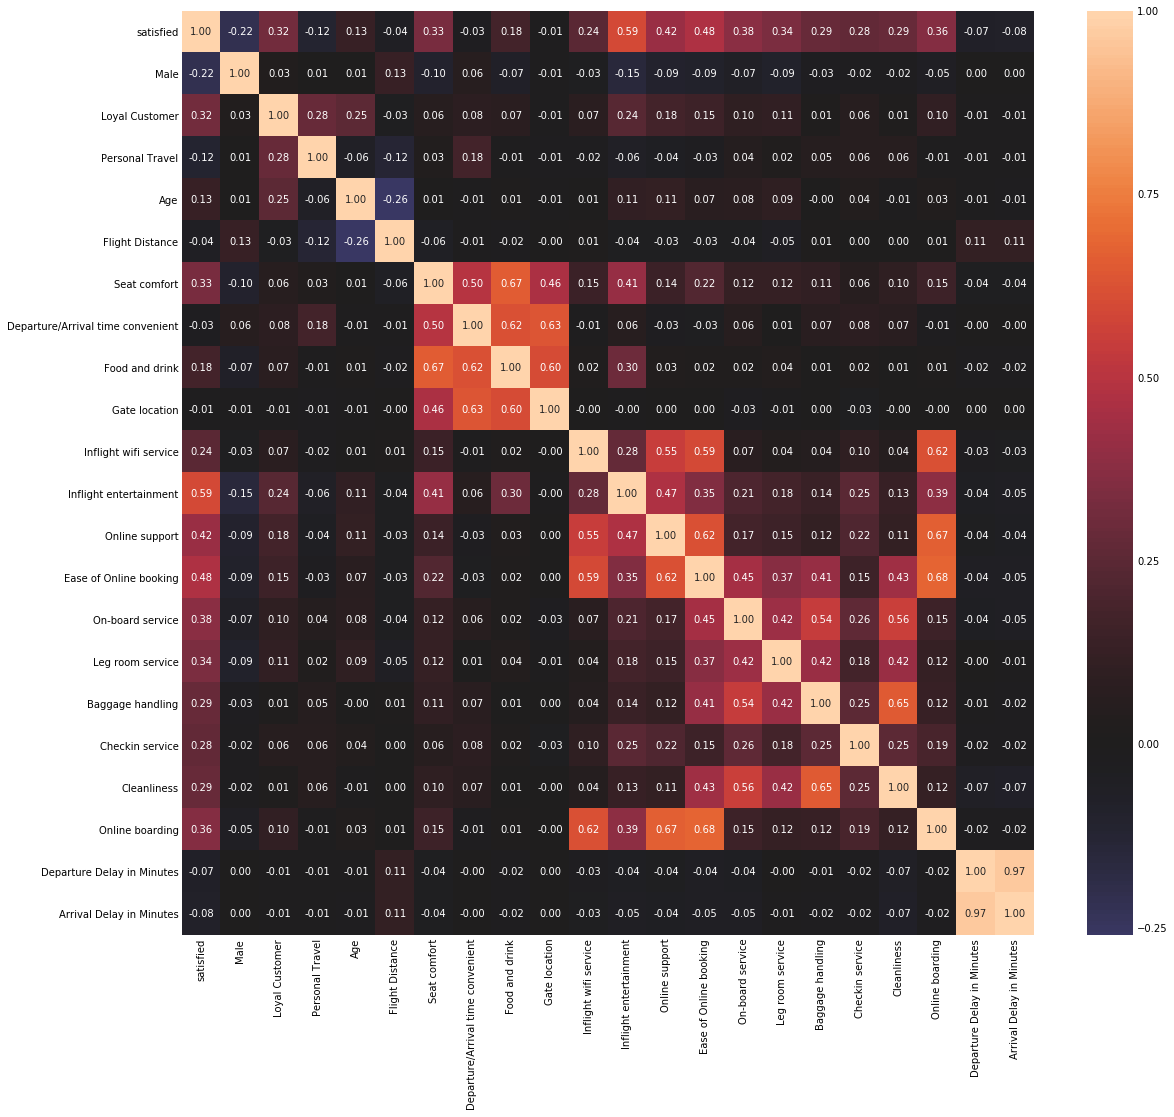

In [9]:
import seaborn as sns
%matplotlib inline
plots.figure(figsize=(17,17))
sns.heatmap(inputraw.corr(), annot=True, fmt='.2f',center=0)

After observing from the Correlation Matrix of all input features, features that are relevant to label and are iid from others are selected and plotted in Figure 11: Correlation Matrix of Interested Features. The features of “x1=Male”, “x2=Loyal Customer”, “x3=Seat comfort”, “x4=Inflight entertainment”, “x5=Online support”, and “x6=On-board service” are believed as essentials and will be processed for machine learning tasks. 

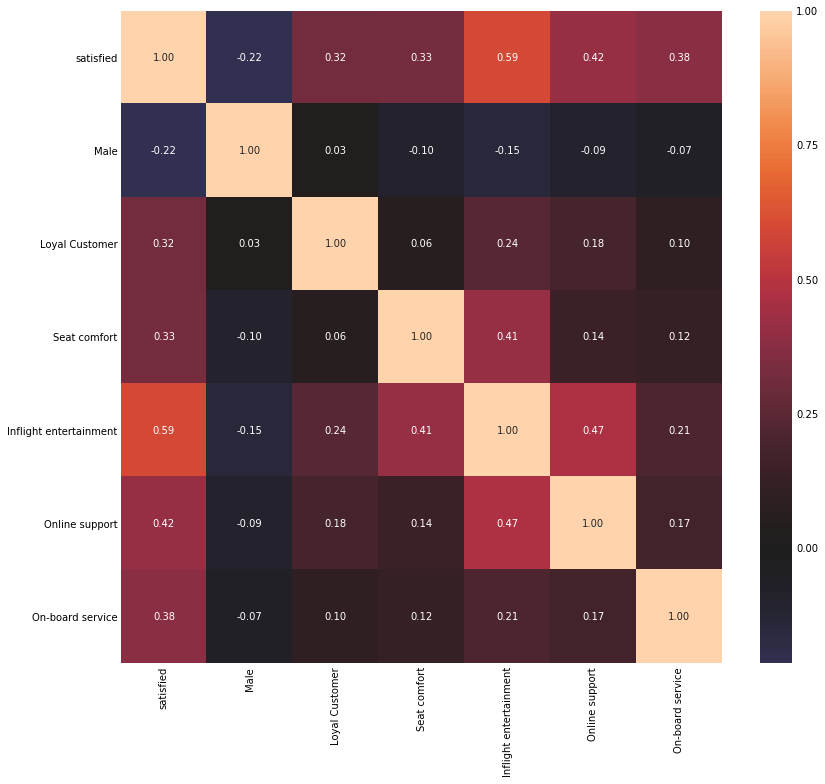

In [10]:
%matplotlib inline
q3 = inputraw
q3 = q3.drop(columns=['Arrival Delay in Minutes'])
q3 = q3.drop(columns=['Departure Delay in Minutes'])
q3 = q3.drop(columns=['Gate location'])
q3 = q3.drop(columns=['Departure/Arrival time convenient'])
q3 = q3.drop(columns=['Flight Distance'])
q3 = q3.drop(columns=['Personal Travel'])
q3 = q3.drop(columns=['Age'])
q3 = q3.drop(columns=['Food and drink'])

q3 = q3.drop(columns=['Inflight wifi service'])
q3 = q3.drop(columns=['Baggage handling'])
q3 = q3.drop(columns=['Checkin service'])
q3 = q3.drop(columns=['Cleanliness'])

q3 = q3.drop(columns=['Ease of Online booking'])
q3 = q3.drop(columns=['Online boarding'])
q3 = q3.drop(columns=['Leg room service'])

plots.figure(figsize=(12,12))
sns.heatmap(q3.corr(), annot=True, fmt='.2f',center=0)

Furthermore, the feature data has been converted into standard unit according to Z=(value-average)/standard deviation. The label “satisfied” is renamed as “Class” and located at the first column. From the new dataset, 20000 data has been extracted and shuffled based on the computational resource. Training data and testing data are in the ratio of 3:7. The k-Nearest Neighbor (KNN) algorithm is programmed for k=3, 5, and 7 without importing any package, and KNN steps can be summarized as:   
1) Take a row from test data;   
2) Check every row in training data;   
3) Get the norm between it and every entry;   
4) Rank to get top k closest neighbours;   
5) Obtain the dominant label from these k data;   
6) Check the predicted label with the row’s real label;   
7) Update accuracy. KNN algorithm of k=3 is attached as the following. 

In [11]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

data = Table.from_df(q3)
q3 = Table().with_columns( 
    'Class', data.column('satisfied'),    
    'x1', standard_units(data.column('Male')),
    'x2', standard_units(data.column('Loyal Customer')),
    'x3', standard_units(data.column('Seat comfort')),
    'x4', standard_units(data.column('Inflight entertainment')),
    'x5', standard_units(data.column('Online support')),
    'x6', standard_units(data.column('On-board service'))    
) # convert feature data into standard units and simplify feature title
q3

Class,x1,x2,x3,x4,x5,x6
0,1.01418,0.437786,-1.50299,-1.97153,-1.95842,0.412928
0,1.01418,0.437786,-1.50299,-1.97153,0.354763,-1.1654
0,1.01418,0.437786,-1.50299,-1.97153,-1.95842,-0.376234
0,1.01418,0.437786,-1.50299,-1.97153,1.12582,-1.95456
0,1.01418,0.437786,-1.50299,-1.97153,1.12582,-1.95456
0,1.01418,0.437786,-1.50299,-1.97153,1.12582,-0.376234
0,1.01418,0.437786,-1.50299,-1.97153,1.12582,-1.1654
0,1.01418,0.437786,-1.50299,-1.97153,-0.416297,-0.376234
0,1.01418,0.437786,-1.50299,-1.97153,-0.416297,-0.376234
0,1.01418,0.437786,-1.50299,-1.97153,-1.18736,-1.95456


In [12]:
from sklearn.model_selection import train_test_split
q3in = q3.sample(20000, with_replacement=True) 
q3in = q3in.to_df()
q3trainml, q3testml = train_test_split(q3in, test_size = 0.3)

q3train = Table.from_df(q3trainml)
q3test = Table.from_df(q3testml)

q3train = q3train.to_array()
q3test = q3test.to_array()

In [13]:
import time

start = time.time()

k=3 #set k-Nearest Neighbor
correectnum = 0
incorreectnum = 0
for i in range(len(q3test)):
    testrow = list(q3test[i]) #take a row from test data
    
    traindist = []
    for i in range(len(q3train)):   
        trainrow = list(q3train[i]) #take a row from training data
        vectorjian = np.subtract(trainrow[1:], testrow[1:]) #remove the 1st label and find vector difference
        twoptnorm = np.linalg.norm(vectorjian) #get norm from vector difference
        traindist.append((trainrow, twoptnorm))
        
    traindist.sort(key=operator.itemgetter(1)) #ranking the key to get the closest neighbours
    
    ktrainrows = []
    for i in range(k):
        ktrainrows.append(traindist[i][0]) #hold training rows with k amount   

    countneg1 = 0
    count1 = 0
    for j in range(len(ktrainrows)):
        if ktrainrows[j][0] == 0: #is training row's 1st label match?
            countneg1 += 1
        else:
            count1 += 1
    if countneg1 > count1: #compare which label is more
        if q3test[i][0] == 0:
            correectnum += 1
        else:
            incorreectnum += 1
    else:
        if q3test[i][0] == 1:
            correectnum += 1
        else:
            incorreectnum += 1
end = time.time()

elapsed = end - start
            
print('When k=3, The accuracy is: ', correectnum / (correectnum + incorreectnum)) #calculate the accuracy of the classifier
print('Running Time is: ', elapsed) 

When k=3, The accuracy is:  0.4655
Running Time is:  1091.6301560401917


In [14]:
import time

start = time.time()

k=5 #set k-Nearest Neighbor
correectnum = 0
incorreectnum = 0
for i in range(len(q3test)):
    testrow = list(q3test[i]) #take a row from test data
    
    traindist = []
    for i in range(len(q3train)):   
        trainrow = list(q3train[i]) #take a row from training data
        vectorjian = np.subtract(trainrow[1:], testrow[1:]) #remove the 1st label and find vector difference
        twoptnorm = np.linalg.norm(vectorjian) #get norm from vector difference
        traindist.append((trainrow, twoptnorm))
        
    traindist.sort(key=operator.itemgetter(1)) #ranking the key to get the closest neighbours
    
    ktrainrows = []
    for i in range(k):
        ktrainrows.append(traindist[i][0]) #hold training rows with k amount   

    countneg1 = 0
    count1 = 0
    for j in range(len(ktrainrows)):
        if ktrainrows[j][0] == 0: #is training row's 1st label match?
            countneg1 += 1
        else:
            count1 += 1
    if countneg1 > count1: #compare which label is more
        if q3test[i][0] == 0:
            correectnum += 1
        else:
            incorreectnum += 1
    else:
        if q3test[i][0] == 1:
            correectnum += 1
        else:
            incorreectnum += 1
end = time.time()

elapsed = end - start
            
print('When k=5, The accuracy is: ', correectnum / (correectnum + incorreectnum)) #calculate the accuracy of the classifier
print('Running Time is: ', elapsed) 

When k=5, The accuracy is:  0.5301666666666667
Running Time is:  1116.3053467273712


In [15]:
import time

start = time.time()

k=7 #set k-Nearest Neighbor
correectnum = 0
incorreectnum = 0
for i in range(len(q3test)):
    testrow = list(q3test[i]) #take a row from test data
    
    traindist = []
    for i in range(len(q3train)):   
        trainrow = list(q3train[i]) #take a row from training data
        vectorjian = np.subtract(trainrow[1:], testrow[1:]) #remove the 1st label and find vector difference
        twoptnorm = np.linalg.norm(vectorjian) #get norm from vector difference
        traindist.append((trainrow, twoptnorm))
        
    traindist.sort(key=operator.itemgetter(1)) #ranking the key to get the closest neighbours
    
    ktrainrows = []
    for i in range(k):
        ktrainrows.append(traindist[i][0]) #hold training rows with k amount   

    countneg1 = 0
    count1 = 0
    for j in range(len(ktrainrows)):
        if ktrainrows[j][0] == 0: #is training row's 1st label match?
            countneg1 += 1
        else:
            count1 += 1
    if countneg1 > count1: #compare which label is more
        if q3test[i][0] == 0:
            correectnum += 1
        else:
            incorreectnum += 1
    else:
        if q3test[i][0] == 1:
            correectnum += 1
        else:
            incorreectnum += 1
end = time.time()

elapsed = end - start
            
print('When k=7, The accuracy is: ', correectnum / (correectnum + incorreectnum)) #calculate the accuracy of the classifier
print('Running Time is: ', elapsed) 

When k=7, The accuracy is:  0.541
Running Time is:  1147.0756587982178


According to Professor’s feedback in presentation, other Machine Learning algorithms in Decision Tree, Random Forest, and Bagging are also studied. The same training data and testing data are imported to the packages. The packages are from sklearn, and its score function returns the accuracy of the model. The dataset has been processed with these algorithms, and their codes are listed as below. 

In [16]:
x_train = q3trainml.iloc[0:,1:7]
y_train = q3trainml[['Class']]
x_test = q3testml.iloc[0:,1:7]
y_test = q3testml[['Class']]

In [17]:
# Machine Learning task using Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
modeltree = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
modeltree.fit(x_train,y_train)
print("Decision Tree accuracy is: ",modeltree.score(x_test,y_test))

Decision Tree accuracy is:  0.8298333333333333


In [18]:
# Machine Learning task using Random Forest
from sklearn.ensemble import RandomForestClassifier
modelforest = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
modelforest.fit(x_train,np.ravel(y_train))
print("Random Forest accuracy is: ",modelforest.score(x_test,y_test))

Random Forest accuracy is:  0.8853333333333333


In [19]:
# Machine Learning task using Bagging
from sklearn.ensemble import BaggingClassifier
modelbag = BaggingClassifier()
modelbag.fit(x_train,np.ravel(y_train))
print("Bagging accuracy is: ",modelbag.score(x_test,y_test))

Bagging accuracy is:  0.8851666666666667


### 4 Conclusion
Three proposed questions have been solved. The first problem shows that passengers who are satisfied are dominated by loyal customers. In the second problem, passengers might not have a strong opinion on food and drink, so there is a space of improvement for airline companies to improve the services to attract more customers. In the last question, machine learning tasks have been accomplished, and different classifiers have been tested on this dataset. The accuracy of each classifier is estimated. 